In [1]:
import (
    "bytes"
	"image/color"
	"log"
	"os"

    "gonum.org/v1/plot"
    "gonum.org/v1/plot/plotter"
    "gonum.org/v1/plot/vg"
    "github.com/go-gota/gota/dataframe"
    "github.com/janpfeifer/gonb/gonbui"
)

In [2]:
func displayPlot(p *plot.Plot) {
    var buf bytes.Buffer
    c, err := p.WriterTo(10*vg.Inch, 4*vg.Inch, "png")
    if err != nil {
        panic(err)
    }
    
    if _, err := c.WriteTo(&buf); err != nil {
        panic(err)
    }

    gonbui.DisplayPNG(buf.Bytes())
}

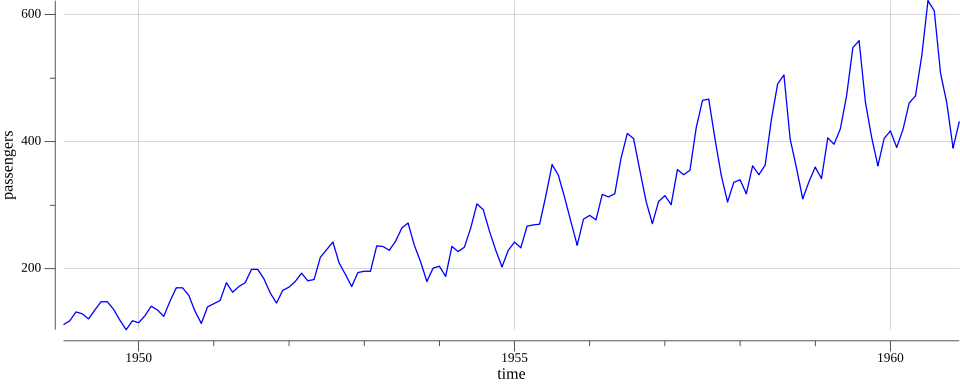

In [3]:
func main() {

	// Open the CSV file.
	passengersFile, err := os.Open("AirPassengers.csv")
	if err != nil {
		log.Fatal(err)
	}
	defer passengersFile.Close()

	// Create a dataframe from the CSV file.
	passengersDF := dataframe.ReadCSV(passengersFile)

	// Extract the number of passengers column.
	yVals := passengersDF.Col("AirPassengers").Float()

	// pts will hold the values for plotting.
	pts := make(plotter.XYs, passengersDF.Nrow())

	// Fill pts with data.
	for i, floatVal := range passengersDF.Col("time").Float() {
		pts[i].X = floatVal
		pts[i].Y = yVals[i]
	}

	// Create the plot.
	p := plot.New()
	p.X.Label.Text = "time"
	p.Y.Label.Text = "passengers"
	p.Add(plotter.NewGrid())

	// Add the line plot points for the time series.
	l, err := plotter.NewLine(pts)
	if err != nil {
		log.Fatal(err)
	}
	l.LineStyle.Width = vg.Points(1)
	l.LineStyle.Color = color.RGBA{B: 255, A: 255}

	// Save the plot to a PNG file.
	p.Add(l)

    displayPlot(p)
}